<a href="https://colab.research.google.com/github/ReshmaShinde123/ReshmaShinde123/blob/main/Credit_Card_ROS_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
# to load csv file
df=pd.read_csv("/content/drive/My Drive/Notebook_ML/Rcreditcard.csv")

Mounted at /content/drive


**Description of Dataset:**

**Context:** 

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content:**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.It contains only numerical input variables which are the result of a PCA transformation.
The only Time' and 'Amount' have not been transformed with PCA.

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Exploratory Data Analysis - EDA

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


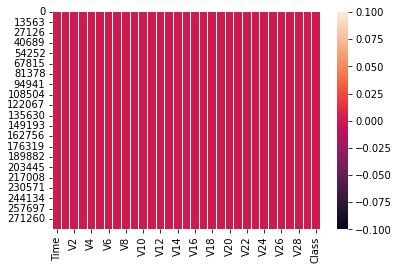

In [ ]:
#Check null values alongwith heat map
print(df.isnull().sum())
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#Check Datatypes of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Check unique elements for all columns
for col in df:
    print(col)
    print(df[col].unique())

Time
[0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
V1
[-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
V2
[-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
V3
[ 2.53634674  0.16648011  1.77320934 ... -3.24963981  0.70251023
  0.70333737]
V4
[ 1.37815522  0.44815408  0.37977959 ... -0.55782812  0.68979917
 -0.50627124]
V5
[-0.33832077  0.06001765 -0.50319813 ...  2.63051512 -0.37796113
 -0.01254568]
V6
[ 0.46238778 -0.08236081  1.80049938 ...  3.0312601   0.62370772
 -0.64961669]
V7
[ 0.23959855 -0.07880298  0.79146096 ... -0.29682653 -0.68617999
  1.57700625]
V8
[ 0.0986979   0.08510165  0.24767579 ...  0.70841718  0.67914546
 -0.41465041]
V9
[ 0.36378697 -0.25542513 -1.51465432 ...  0.43245405  0.39208671
  0.48617951]
V10
[ 0.09079417 -0.16697441  0.20764287 ... -0.48478176 -0.39912565
 -0.91542665]
V11
[-0.55159953  1.61272666  0.62450146 ...  0.41161374 -1.93384882
 -1.04045834]
V12
[-0.6178

In [ ]:
#Check unique elements for all columns with value count
df.value_counts()

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56    0        18
          -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.85526

In [ ]:
#Check the stastical report
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Class is our Target 1 = Fraud , 0 = No fraud
#Check how much no of fraud counts in data set
df["Class"].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#Check the % of fraud count
df["Class"].value_counts()/df.shape[0]*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

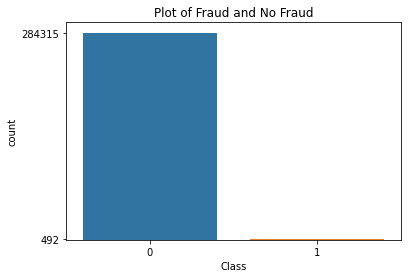

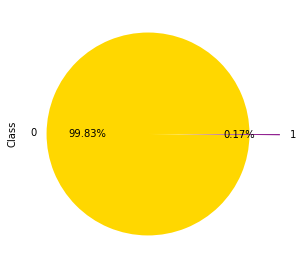

In [ ]:
#Check the data is balanced or imbalanced using countplot
sns.countplot(data=df,x="Class")
c=df["Class"].value_counts()
plt.yticks(c)
plt.title('Plot of Fraud and No Fraud')
plt.show()

#Check the pie chart
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df['Class'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',explode=(0,0.3),colors=['gold','purple'])
plt.show()

Data is highly imbalanced

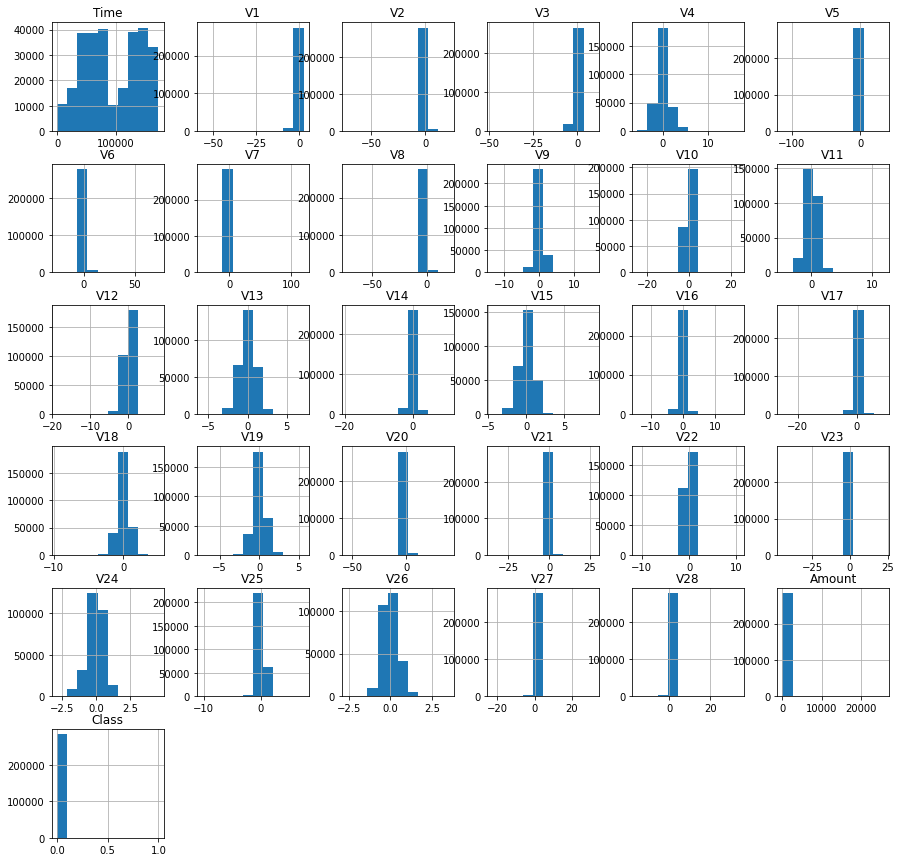

In [ ]:
#Check the skewness but dont treat them as our ML Algos has feature to treat skewness
df.hist(figsize=(15,15))
plt.show()

In [ ]:
#In Classification type dataset there is no need to check correlation as values are in range 0-1

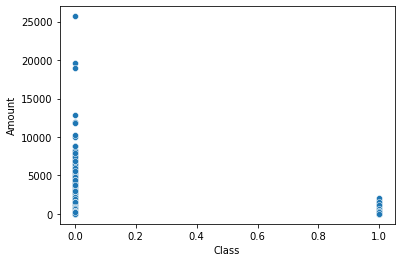

In [ ]:
#To understand cost sensative learning we should plot scatter plot of Amount Vs Class
sns.scatterplot(data=df,x="Class",y="Amount")
plt.show()

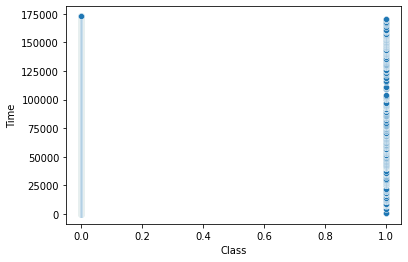

In [ ]:
#To understand cost sensative learning we should plot scatter plot of Amount Vs Class
sns.scatterplot(data=df,x="Class",y="Time")
plt.show()

So from above scatterplot it is again confirmed that it is unbalanced dataset

Start the Modelling

In [ ]:
#Now, #Select Input and Output
X=df.drop("Class",axis=1)#input selection.temporary as inplace=True not used
Y=df["Class"]#output
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#Perform train_test_split
from sklearn.model_selection import train_test_split

#Split the dataset in train test of 70% to 30%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [ ]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
print("Training data:{}".format(X_train.shape))
print("Test data:{}".format(X_test.shape))

Training data:(199364, 30)
Test data:(85443, 30)


Scaling

In [ ]:
#Real-world datasets often contain features that are varying in degrees of magnitude, range and units
#The scaling is used for making data points generalized 
#so that the distance between them will be lower.
#We will standardise the data with StandardScaler
from sklearn.preprocessing import StandardScaler
#Create object of the class
ss=StandardScaler()

In [ ]:
#Transform the dataset
X_train=ss.fit_transform(X_train)#training data
X_test=ss.transform(X_test)# testsing data

In [ ]:
#Create user defined function to avoid repetitive task
def create_model(model): #here model is user defined object
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test)#test the model
    print(classification_report(Y_test,Y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test,Y_pred))
    return model 

# **1) Logistic Regression - Baseline Model**

In [ ]:
#We 1st need to perform logistic regression:Baseline Model of Classification Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#create the object of logisticRegressionClass
lr=LogisticRegression()
#Call the function create model
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix
[[85293    15]
 [   57    78]]


In [ ]:
#Check the training - testing score in Logistic regression model to decide overfitting and underfitting of the model.
print("training score:\n",lr.score (X_train,Y_train))#training score
print("Testing score:\n",lr.score(X_test,Y_test))#testing score

training score:
 0.9992526233422283
Testing score:
 0.9991573329588147


#After performing logistic regression we found precision as 84% and recall as 58%.Which is again shows imbalancing of data. So, we apply the sampling techniques to balance the data and check the overfitting and underfitting of model in dataset.


In [ ]:
#Use Random Sampling Techniques
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

Random Over Sampling

In [ ]:
#RandomOverSampler
#Create object of RandomOverSampler() class
ros=RandomOverSampler()

In [ ]:
#fit_resample() inbuilt method of RandomOverSampler()class
#Apply on training data
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)
#Before apply RandomOverSampler() on training data
print("Before apply RandomOverSampler() on training data:\n",pd.Series(Y_train).value_counts())
#after apply RandomOverSampler() on training data
print("After apply RandomOverSampler() on training data:\n",pd.Series(Y_train1).value_counts())

Before apply RandomOverSampler() on training data:
 0    199007
1       357
Name: Class, dtype: int64
After apply RandomOverSampler() on training data:
 0    199007
1    199007
Name: Class, dtype: int64


In [ ]:
#Apply RandomOverSampler over 30 % testing data
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [ ]:
#Before apply RandomOverSampler() on 30% testing data
print("Before apply RandomOverSampler() on testing data:\n",pd.Series(Y_test).value_counts())
#after apply RandomOverSampler() on 30% testing data
print("After apply RandomOverSampler() on testing data:\n",pd.Series(Y_test1).value_counts())

Before apply RandomOverSampler() on testing data:
 0    85308
1      135
Name: Class, dtype: int64
After apply RandomOverSampler() on testing data:
 0    85308
1    85308
Name: Class, dtype: int64


In [ ]:
#To check report after Random Over Sampling
#Create user defined function
def create_model1(model): #here model is user defined object
    model.fit(X_train1,Y_train1) #train the model
    Y_pred=model.predict(X_test1)#test the model
    print(classification_report(Y_test1,Y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test1,Y_pred))
    return model 

In [ ]:
#Now again feed the ROS data to create baseline model: Logistic Regression
# Create object of Logisticregression class
lr1=LogisticRegression()
lr1=create_model1(lr1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

Confusion Matrix
[[83723  1585]
 [ 8822 76486]]


Random Under Sampling

In [ ]:
# Lets check with Random Under Sampling
#Use RandomUnderSampler
#Create object of RandomOverSampler() class
rus=RandomUnderSampler()

In [ ]:
#fit_resample() inbuilt method of RandomUnderSampler()class
X_train2,Y_train2=rus.fit_resample(X_train,Y_train)
#Before apply RandomUnderSampler() on training data
print("Before apply RandomUnderSampler() on training data:\n",pd.Series(Y_train).value_counts())

#After apply RandomUnderSampler() on training data
print("After apply RandomUnderSampler() on training data:\n",pd.Series(Y_train2).value_counts())


Before apply RandomUnderSampler() on training data:
 0    199007
1       357
Name: Class, dtype: int64
After apply RandomUnderSampler() on training data:
 0    357
1    357
Name: Class, dtype: int64


In [ ]:
#Apply RandomUnderSampler over 30 % testing data
X_test2,Y_test2=rus.fit_resample(X_test,Y_test)
#Before apply RandomUnderSampler() on 30% testing data
print("Before apply RandomUnderSampler() on testing data:\n",pd.Series(Y_test).value_counts())

#after apply RandomUnderSampler() on testing data
print("After apply RandomUnderSampler() on testing data:\n",pd.Series(Y_test2).value_counts())

Before apply RandomUnderSampler() on testing data:
 0    85308
1      135
Name: Class, dtype: int64
After apply RandomUnderSampler() on testing data:
 0    135
1    135
Name: Class, dtype: int64


In [ ]:
#To check report after Random Under Sampling
#Create user defined function
def create_model2(model): #here model is user defined object
    model.fit(X_train2,Y_train2) #train the model
    Y_pred=model.predict(X_test2)#test the model
    print(classification_report(Y_test2,Y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test2,Y_pred))
    return model 

In [ ]:
#create baseline model: Logistic Regression
# Create object of Logisticregression class
lr2=LogisticRegression()
lr2=create_model2(lr2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       135
           1       0.98      0.89      0.93       135

    accuracy                           0.93       270
   macro avg       0.94      0.93      0.93       270
weighted avg       0.94      0.93      0.93       270

Confusion Matrix
[[132   3]
 [ 15 120]]


RandomOver - Logistic Score = 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

RandomUnder - Logistic Score = 
                precision    recall  f1-score   support

           0       0.90      0.96      0.93       135
           1       0.96      0.89      0.92       135

From the above tables we can see sampling techniques are getting more or less same scores .But as no fraud data is more than fraud we are considering to apply random over sampling on dataset.

Lets us check the training testing scores of both sampling models to check the overfitting/underfitting of the models.

In [ ]:
#Training -testinging scores of ROS
print("training score:\n",lr1.score (X_train1,Y_train1))#training score
print("Testing score:\n",lr1.score(X_test1,Y_test1))#testing score

training score:
 0.9558583366414247
Testing score:
 0.9390033760022507


In [ ]:
#Training -testinging scores of RUS
print("training score:\n",lr2.score (X_train2,Y_train2))#training score
print("Testing score:\n",lr2.score(X_test2,Y_test2))#testing score

training score:
 0.9551820728291317
Testing score:
 0.9333333333333333


We are getting good accuracy and scores and found that model is overfit after applying sampling techniques on Logistic Regression. 

But our baselien model is stating that recall scores are not good. This can be try to improved with pandas visualisation techniques by selecting important features and again feeding them to Logistic Regression

Now, we will further use the data used for our base line model to other classification algos

#2) Decision Tree Algorithms:
Data preparation: The decision Tree algorithms manages its own data preparation internally, so pretreatment to data is not required

In [ ]:
#import class
from sklearn.tree import DecisionTreeClassifier

2.1) Decision Tree with Gini Index

In [ ]:
#create the object of class DecisionTreeClassfier
dt=DecisionTreeClassifier()
#call function 
dt=create_model1(dt)

              precision    recall  f1-score   support

           0       0.75      1.00      0.85     85308
           1       1.00      0.66      0.79     85308

    accuracy                           0.83    170616
   macro avg       0.87      0.83      0.82    170616
weighted avg       0.87      0.83      0.82    170616

Confusion Matrix
[[85272    36]
 [29094 56214]]


In [ ]:
#Check the important features taken by Decision Tree
d={'Features Imp':dt.feature_importances_,'Columns':X.columns}
#convert dictionary into DataFrae
data=pd.DataFrame(d)
#convert dictionary into DataFrae
data=pd.DataFrame(d)
data

,Features Imp,Columns
0,0.012785,Time
1,0.002622,V1
2,0.002537,V2
3,0.002654,V3
4,0.044340,V4
5,0.014146,V5
6,0.008518,V6
7,0.011755,V7
8,0.000829,V8
9,0.005569,V9


In [ ]:
#But we got less score 0.73  its good but not excellent 
#reason behind less score , means overfit 
#model overfitting situation can be managed by pruning technique
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter

2.1.1) max_depth

In [ ]:
#Create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(max_depth=8) 
#Note:max_depth can not more than 8
#by default use method:gini index
dt1=create_model1(dt1)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     85308
           1       0.99      0.82      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

Confusion Matrix
[[84613   695]
 [15742 69566]]


2.1.2) min_samples_leaf

In [ ]:
#Create object of DecisiontreeClassifier
dt2=DecisionTreeClassifier(min_samples_leaf=100) #by default Gini index method 
#min_samples_leaf =50 or more means not less than=50
#call function
dt2=create_model1(dt2)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     85308
           1       0.99      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix
[[84926   382]
 [15036 70272]]


2.2) Decision Tree Entropy


In [ ]:
#use entropy method of decisiontree means -P(yes)*log2P(yes)-P(No)log2(P(no))
##create object of DecisionTreeClassifier class
dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)
dt3=create_model1(dt3)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

Confusion Matrix
[[85089   219]
 [16979 68329]]


In [ ]:
#Create object of DecisionTreeClassifier class
dt4=DecisionTreeClassifier(criterion='entropy',max_depth=8) 
#Note:max_depth can not more than 8
#by default use method:gini index
dt4=create_model1(dt4)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       0.99      0.76      0.86     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.87    170616
weighted avg       0.90      0.88      0.87    170616

Confusion Matrix
[[84959   349]
 [20867 64441]]


In [ ]:
#Create object of DecisionTreeClassifier class # Checking with Entropy
dt5=DecisionTreeClassifier(criterion='entropy') 
#call the function
dt5=create_model1(dt5)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     85308
           1       1.00      0.72      0.84     85308

    accuracy                           0.86    170616
   macro avg       0.89      0.86      0.86    170616
weighted avg       0.89      0.86      0.86    170616

Confusion Matrix
[[85262    46]
 [24038 61270]]


#**Ensembling Learning Techniques**

3) Naive Aggregation 

a. Hard Voting        b. Soft voting

4) Bootstrapping

a. Bagging 
b. pasting 
c.Random Forest Tree

5) Stacking Classifier

6) Boosting Technique

a. ADA Boost (Adaptor Boosting) 
b. Gradient Boosting 
c. Extreme Gradient Boosting(XG Boost)


3) Naive Aggregation

a. Hard Voting - Hard Voting: Voting is calculated on the predicted output class.

b. Soft voting - Voting is calculated on the predicted probability of the output class.

In [ ]:
#import class
from sklearn.ensemble import VotingClassifier

#Create a model list
model_list=[("logistic",lr),("DecisionTree_Gini",dt),("DecisionTree_Entropy",dt5)]

#Create the object of Voting Classfier and passing the parameter model_list
vc=VotingClassifier(estimators=model_list)#Default is hard voting

#call function
vc=create_model1(vc)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

Confusion Matrix
[[85273    35]
 [18977 66331]]


In [ ]:
#For soft voting pass soft paramet
vc1=VotingClassifier(estimators=model_list,voting="soft")#Default is hard voting

In [ ]:
#call function
vc1=create_model1(vc1)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

Confusion Matrix
[[85271    37]
 [18977 66331]]


4) Bootstrapping

a. Bagging - that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process.

b. Pasting 


'''Difference between Bagging and pasting classifier : - 
In bagging classifier ,  the model is train with different samples with 
replacement .
while other hand  in pasting , the model is train with different samples 
without replacement'''

c.Random Forest Tree

In [ ]:
#import class
from sklearn.ensemble import BaggingClassifier
#a. Bagging Method with Logistic
#Create object of BaggingClassifier
bc=BaggingClassifier(LogisticRegression(),n_estimators=100,max_samples=2848,random_state=1)
#By default Bootstrap is True means Bagging
#no. of records =100*2848=284800 records
#call function
bc=create_model1(bc)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

Confusion Matrix
[[83610  1698]
 [ 8822 76486]]


In [ ]:
#b. Bagging with Decision Tree
bc1=BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples=2848,random_state=1)#Bagging Decision tree
#call function
bc1=create_model1(bc1)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     85308
           1       0.99      0.83      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusion Matrix
[[84891   417]
 [14339 70969]]


In [ ]:
#2. Pasting
#Create object of BaggingClassifier
bc2=BaggingClassifier(LogisticRegression(),n_estimators=100,max_samples=2848,random_state=1,bootstrap=False)
#Bootsrap is False means Pasting
#call function
bc2=create_model1(bc2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

Confusion Matrix
[[83610  1698]
 [ 8822 76486]]


In [ ]:
#c. Random forest tree
#import class
from sklearn.ensemble import RandomForestClassifier
# create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)
#hit and trial method so we can adjust features nos manually
#call function
rfc=create_model1(rfc)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.79      0.88     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

Confusion Matrix
[[85300     8]
 [18333 66975]]


In [ ]:
#Check the important features
d={'Features Imp':rfc.feature_importances_,'Columns':X.columns}
#convert dictionary into DataFrae
data=pd.DataFrame(d)
#convert dictionary into DataFrae
data=pd.DataFrame(d)
data

,Features Imp,Columns
0,0.009240,Time
1,0.004239,V1
2,0.004058,V2
3,0.010531,V3
4,0.031431,V4
5,0.004616,V5
6,0.004375,V6
7,0.007032,V7
8,0.007333,V8
9,0.010003,V9


In [ ]:
rfc.feature_importances_

array([0.00924023, 0.00423916, 0.00405753, 0.01053085, 0.03143146,
       0.004616  , 0.00437538, 0.00703229, 0.00733252, 0.01000259,
       0.07729983, 0.1367171 , 0.15573983, 0.01400766, 0.34532887,
       0.00925281, 0.05848352, 0.01797836, 0.00420744, 0.0121    ,
       0.01775274, 0.00980087, 0.00532922, 0.0062137 , 0.00271   ,
       0.00434852, 0.0068826 , 0.00295687, 0.00613192, 0.01390013])

In [ ]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

6) Boosting Technique
a. ADA Boost (Adaptor Boosting) b. Gradient Boosting c. Extreme Gradient Boosting(XG Boost)

In [ ]:
#a.ADA Boost: Adaptor Boosting
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Create the object of AdaBoostClassifier class and passing the no. of parameter
#in this class
ada=AdaBoostClassifier(n_estimators=75) # n_estimators can be <=100
#AdaBoost create a decision stump means understood use model
#DecisionTreeClassifier
#call function
ada=create_model1(ada)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     85308
           1       0.99      0.87      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

Confusion Matrix
[[84454   854]
 [10753 74555]]


In [ ]:
#b. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100) #not <=100
#call function for classification report
gbc=create_model1(gbc)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.85      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[84854   454]
 [12518 72790]]


In [ ]:
#c.Extreme Gradient Boosting

In [ ]:
#install the external package from python's community first for XGBoost
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
#create object of class XGBClassifier
xgc=XGBClassifier(n_estimators=45,reg_alpha=1)#1 means true
#automatic overfitting: reg means regularisation and alpha or lambda or hyperparameter
#call function for classification report
xgc=create_model1(xgc)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.85      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

Confusion Matrix
[[84657   651]
 [12480 72828]]


7) Support Vector Machines

#1. Linear SVC  : use for linear data

#2. polynomial kernal function : increase the low dimension to high dimension #Non-Linear data
#3. radial basis kernal function #Non-Linear data

In [ ]:
#Linear kernel Function means data is linearly separatable
#use inbuilt class LinearSVC which defined in SVM inbuilt package 
from sklearn.svm import LinearSVC
#SVC - Support Vector Classifier
#craete object
svc=LinearSVC(random_state=1)# by default hard margin no error added on training time
#call function
svc=create_model1(svc)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

Confusion Matrix
[[83826  1482]
 [ 8822 76486]]


In [ ]:
##score not bad but try its better 
#Apply soft margin means add externally error on training time
#create the object of inbuilt class LinearSVC  and passing parameter C
#for error
svc1=LinearSVC(random_state=1,C=0.5) #soft margin # C is parameter for adding error # C always capital
#Range of C : 0.01to0.9
#to reduce overfitting and remove outlier we apply soft margin
#call function
svc1=create_model1(svc1)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

Confusion Matrix
[[83904  1404]
 [10024 75284]]


In [ ]:
#Here if add external error on runtime but no changes in score means no 
#effect on score
#means we have data is non-linear data  , not linear dataset 
#So we will use polynomial kernel function means increase the dimension means
#to converts low dimension data into high dimension means if plot 1D then
#converting into 2D dimension and so on .

In [ ]:
#2. polynomial Kernel function of SVM, so use inbuilt class SVC
from sklearn.svm import SVC
#SVC inbuilt class for non linear data
#Craete the object of SVC class
poly_svc=SVC(random_state=1,kernel="poly")
#call function
poly_svc=create_model1(poly_svc)

KeyboardInterrupt: ignored

In [ ]:
#Scores are changed in plynomial means data is non linear

In [ ]:
#try to check data is nonlinear or radial
#Craete the object of SVC class
r_svc=SVC(random_state=1,kernel="rbf")
#rbf means radial basis function
#call function
r_svc=create_model1(r_svc)

8) Gausssian - NaiveBays theorem

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
#GaussianNB are applied on continuous numerical value of input column
#create the object of GaussianNB class
gnb=GaussianNB()

In [ ]:
#train the model with 70% data
gnb.fit(X_train,Y_train) 

GaussianNB()

In [ ]:
#test if the model with 30% data
Y_pred=gnb.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.06      0.79      0.11       135

    accuracy                           0.98     85443
   macro avg       0.53      0.89      0.55     85443
weighted avg       1.00      0.98      0.99     85443



9) K Nearest Neighbour

In [ ]:
#Use K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#create the object of KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2) 
#p=2 means euclidean metric means sqrt(x2-x1)**2+(y2-y1)**2
#call function
knc=create_model1(knc)

KeyboardInterrupt: ignored

5) Stacking Classifier - Ensemble learning # giving error -it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier

In [ ]:
#Take LogisticRegression algorithm for metaclssifier
#also create a object of LogisticRegression
meta=LogisticRegression()

In [ ]:
#Create the object of StackingClassifier Class
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)


In [ ]:
#sc=create_model(sc)

In [ ]:
#Check PCA Variance
from sklearn.decomposition import PCA


In [ ]:
pc=PCA(n_components=None,random_state=1)

In [ ]:
X.shape

(284807, 30)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
